# Average Scaled MinHash sketch sizes across Genbank domains

scaled = 2000

In [46]:
%matplotlib inline
%config InlineBackend.close_figures = False

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
from ficus import FigureManager

sns.set()
sns.set_style("darkgrid")

In [3]:
domains = ("viral", "archaea", "bacteria", "fungi", "protozoa")
# domains = ("viral", archaea", "protozoa", "fungi")
scaled = 2000

In [4]:
all_domains = []
for domain in domains:
    df = pd.read_csv(f"/data/databases/{domain}.csv").set_index("id")
    df["domain"] = domain
    all_domains.append(df)

In [5]:
all_domains_df = pd.concat(all_domains)

In [6]:
all_domains_df

,21,unique_21,31,unique_31,51,unique_51,bp,domain
id,,,,,,,,
GCA_001504295.1,0,57,0,47,0,26,77,viral
GCA_004070195.1,1,1744,0,1742,1,1726,1767,viral
GCA_004060515.1,0,1744,0,1741,0,1715,1767,viral
GCA_003375945.1,2,4427,1,4414,3,4382,4433,viral
GCA_003825575.1,2,4530,4,4552,5,4456,4548,viral
...,...,...,...,...,...,...,...,...
GCA_002563875.1,28326,56951601,28502,56151628,28580,57463890,58845926,protozoa
GCA_002286825.1,39790,81827887,40509,84021511,41276,86828247,126261093,protozoa
GCA_001939145.1,307361,624386858,333216,679427125,349098,701412744,808226712,protozoa


In [7]:
df = all_domains_df

In [66]:
len(df)

514209

In [68]:
df.groupby("domain").describe().applymap(lambda x: "{:,.0f}".format(x))["21"]

,count,mean,std,min,25%,50%,75%,max
domain,,,,,,,,
archaea,"5,234",767,575,0,372,718,"1,053","6,476"
bacteria,"464,485","1,946",724,0,"1,360","2,300","2,401","8,842"
fungi,"6,984","13,917","13,152",0,"5,897","13,388","18,865","717,095"
protozoa,"1,093","18,115","27,821",0,"8,392","13,365","21,435","388,673"
viral,"36,413",20,212,0,2,6,20,"23,397"


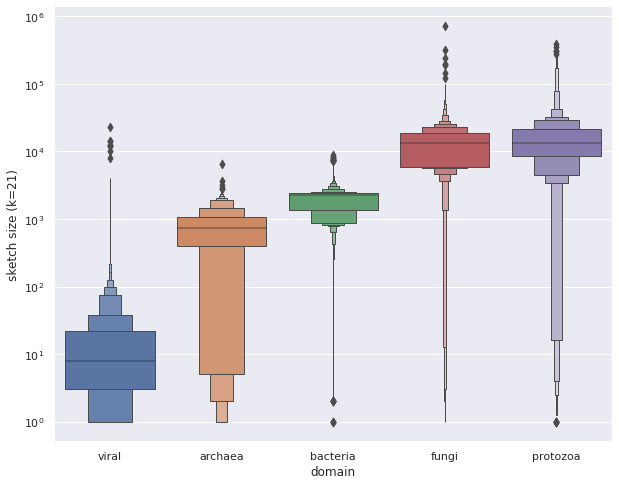

In [56]:
plot_df = df[df != 0]

with FigureManager(figsize=(10, 8), show=True, filename="../figures/sizes.pdf") as (fig, ax):
    sns.boxenplot(data=plot_df, y="21", x="domain", ax=ax)
    ax.set_yscale("log")
    ax.set_ylabel("sketch size (k=21)")

In [22]:
plot_df.head()

,21,unique_21,31,unique_31,51,unique_51,bp,domain
id,,,,,,,,
GCA_001504295.1,NaN,57.0,NaN,47.0,NaN,26.0,77,viral
GCA_004070195.1,1.0,1744.0,NaN,1742.0,1.0,1726.0,1767,viral
GCA_004060515.1,NaN,1744.0,NaN,1741.0,NaN,1715.0,1767,viral
GCA_003375945.1,2.0,4427.0,1.0,4414.0,3.0,4382.0,4433,viral
GCA_003825575.1,2.0,4530.0,4.0,4552.0,5.0,4456.0,4548,viral


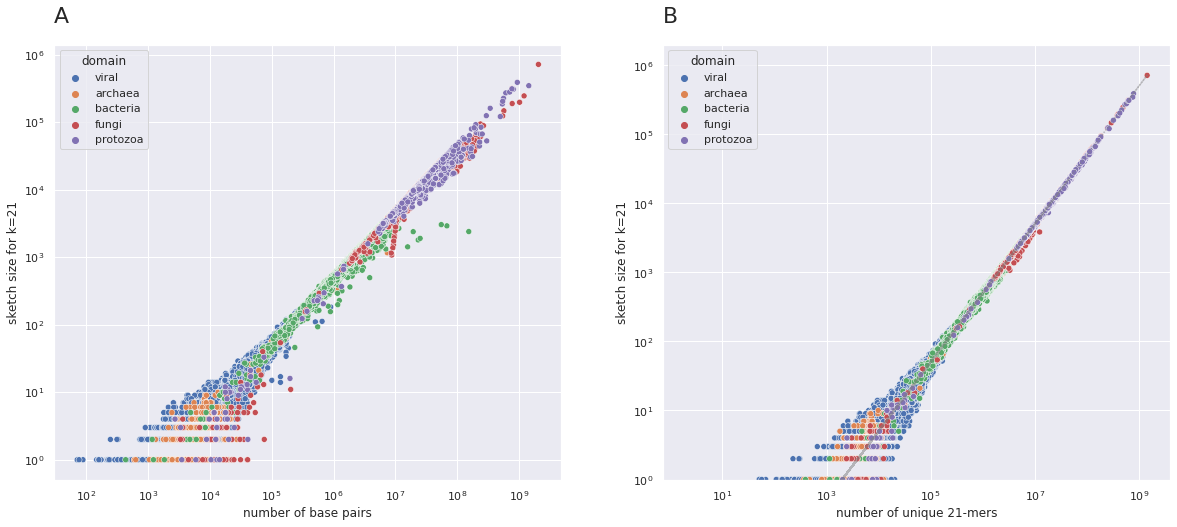

In [63]:
with FigureManager(figsize=(20, 8), show=True, filename="../figures/sizes_bp_unique.png", ncols=2) as (fig, ax):
    sns.scatterplot(data=plot_df, y="21", x="bp", hue="domain", ax=ax[0])
    ax[0].set_xscale("log")
    ax[0].set_yscale("log")
    ax[0].set_ylabel("sketch size for k=21")
    ax[0].set_xlabel("number of base pairs")
    ax[0].text(0, 1.05, "A", transform=ax[0].transAxes, fontsize=22)

    k = "21"
    ax[1].plot(
        plot_df[f"unique_{k}"],
        plot_df[f"unique_{k}"] / 2000,
        color="gray",
        alpha=0.5,
        dashes=[1, 1],
    )
    sns.scatterplot(data=plot_df, y=k, x=f"unique_{k}", hue="domain", ax=ax[1])
    ax[1].set_xscale("log")
    ax[1].set_yscale("log")
    ax[1].set_xlabel("number of unique 21-mers")
    ax[1].set_ylabel("sketch size for k=21")
    ax[1].set_ylim((1, None))
    ax[1].text(0, 1.05, "B", transform=ax[1].transAxes, fontsize=22)

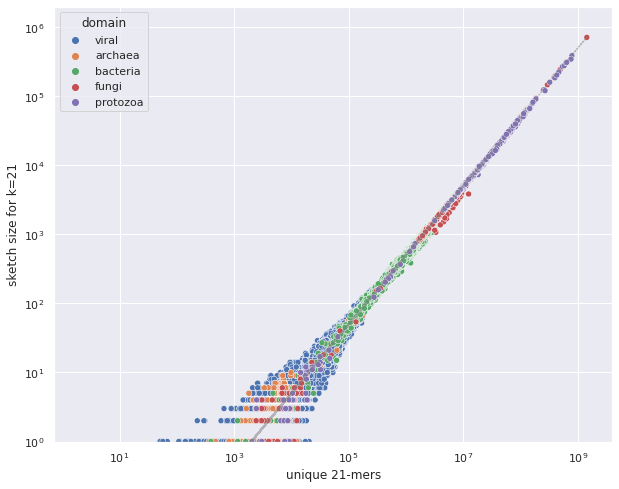

In [58]:
with FigureManager(figsize=(10, 8), show=True, filename="../figures/sizes_unique.pdf") as (fig, ax):
    k = "21"
    ax.plot(
        plot_df[f"unique_{k}"],
        plot_df[f"unique_{k}"] / 2000,
        color="gray",
        alpha=0.5,
        dashes=[1, 1],
    )
    sns.scatterplot(data=plot_df, y=k, x=f"unique_{k}", hue="domain", ax=ax)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("unique 21-mers")
    ax.set_ylabel("sketch size for k=21")
    ax.set_ylim((1, None))

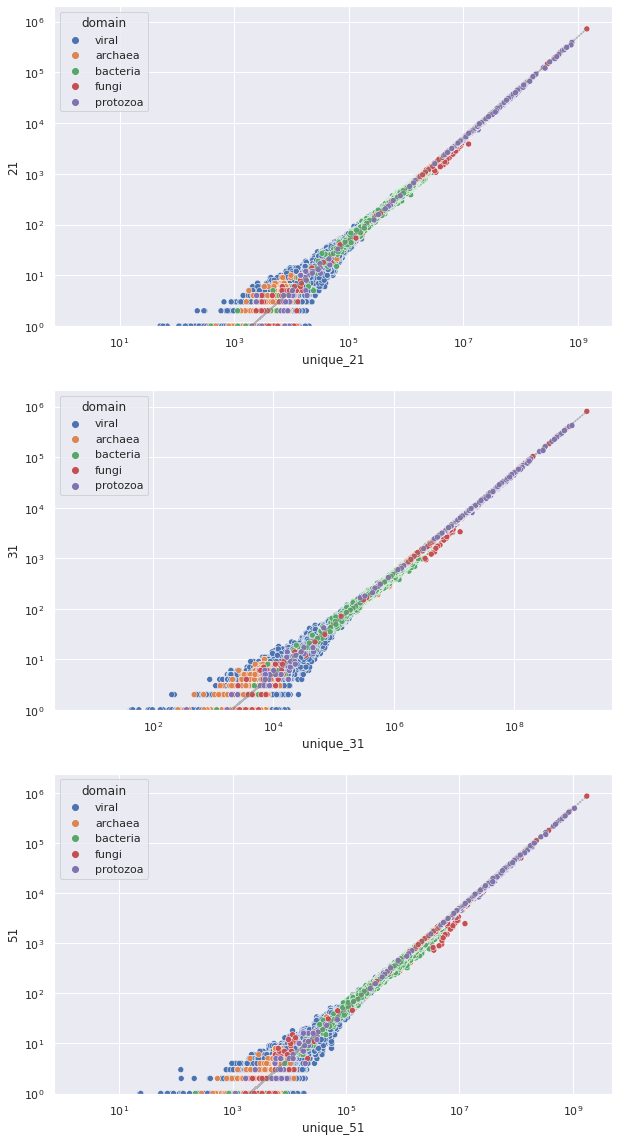

In [24]:
with FigureManager(figsize=(10, 20), show=True, ncols=1, nrows=3) as (fig, axes):
    for k, ax in zip(("21", "31", "51"), axes):
        ax.plot(
            plot_df[f"unique_{k}"],
            plot_df[f"unique_{k}"] / 2000,
            color="gray",
            alpha=0.5,
            dashes=[1, 1],
        )
        sns.scatterplot(data=plot_df, y=k, x=f"unique_{k}", hue="domain", ax=ax)
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_ylim((1, None))

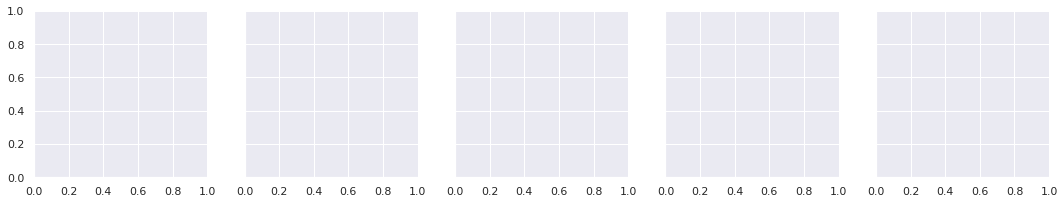

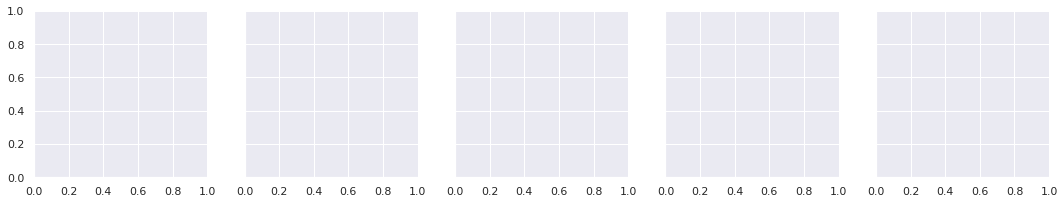

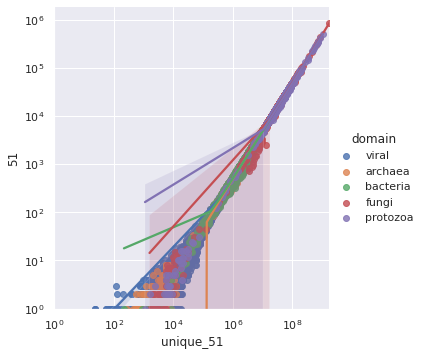

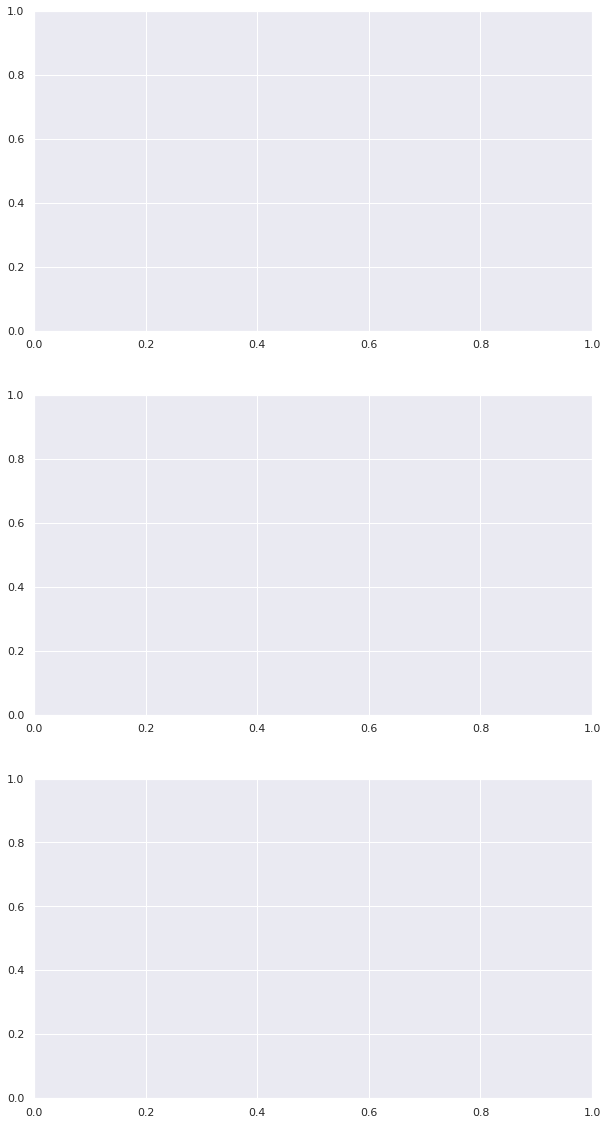

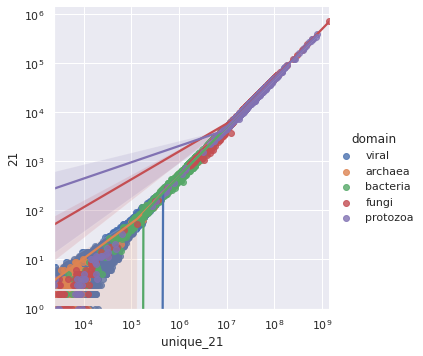

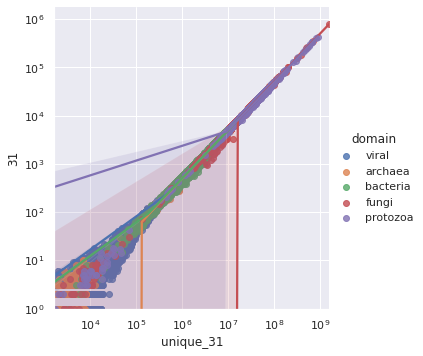

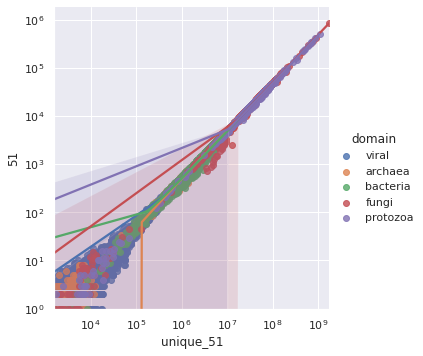

In [34]:
with FigureManager(figsize=(10, 20), show=True, ncols=1, nrows=3) as (fig, axes):
    for k, ax in zip(("21", "31", "51"), axes):
        g = sns.lmplot(data=plot_df, y=k, x=f"unique_{k}", hue="domain")
        g.ax.set_xscale("log")
        g.ax.set_yscale("log")
        g.ax.set_ylim((1, None))

(1, 1882830.6785367716)

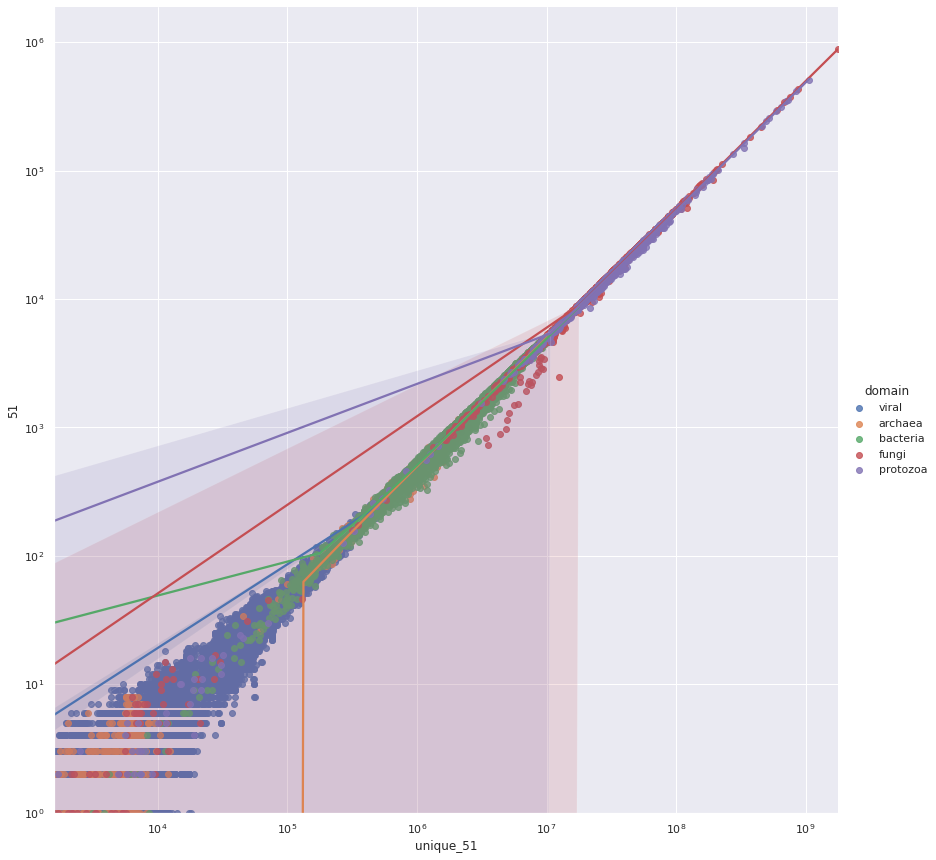

In [35]:
k = "51"

g = sns.lmplot(data=plot_df, y=k, x=f"unique_{k}", hue="domain", height=12)
g.ax.set_xscale("log")
g.ax.set_yscale("log")
g.ax.set_ylim((1, None))